##Applied Data Science

##Assignment - 2

##Name: Tatineni Jayanth

##Registration Number: 20BCB7048

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [4]:
data=pd.read_csv("titanic.csv")

In [5]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Univariate Analysis

<Axes: ylabel='Frequency'>

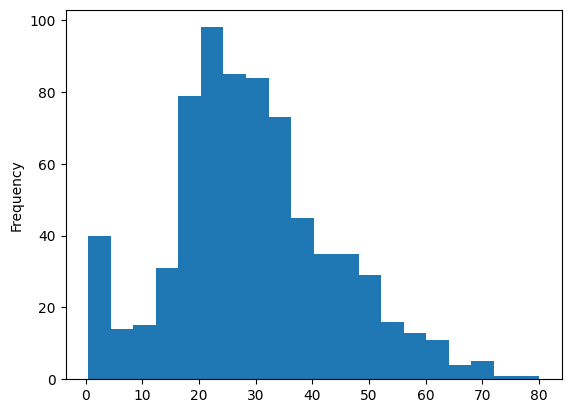

In [8]:
data['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

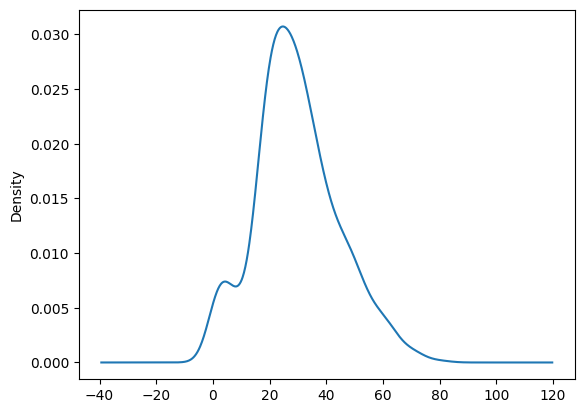

In [9]:
data['age'].plot(kind='kde')

<Axes: ylabel='Frequency'>

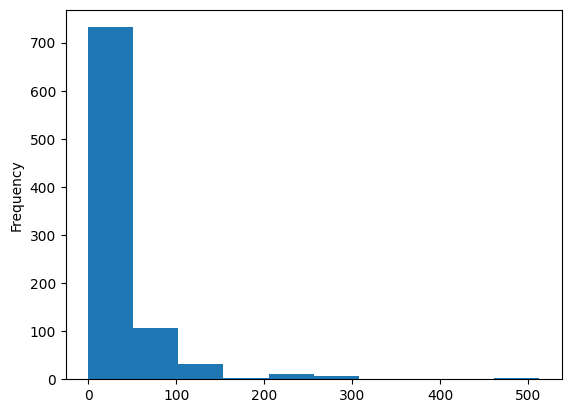

In [10]:
data['fare'].plot(kind='hist')

<Axes: ylabel='Density'>

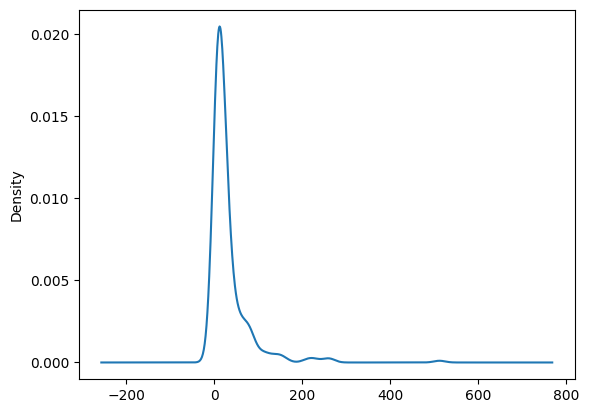

In [11]:
data['fare'].plot(kind='kde')

<Axes: >

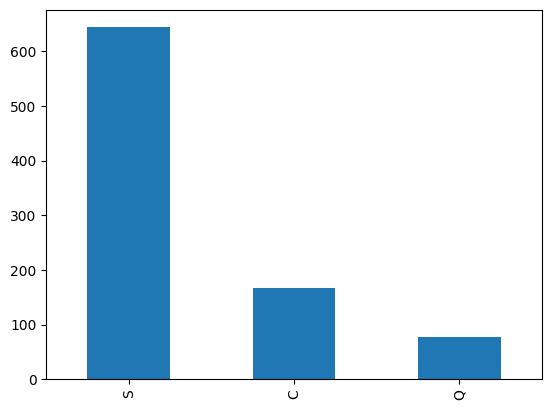

In [12]:
data['embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='class', ylabel='count'>

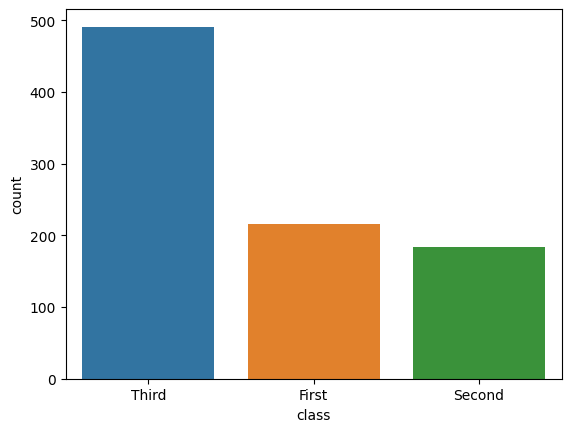

In [13]:
sns.countplot(data = data, x = "class")

<Axes: ylabel='embarked'>

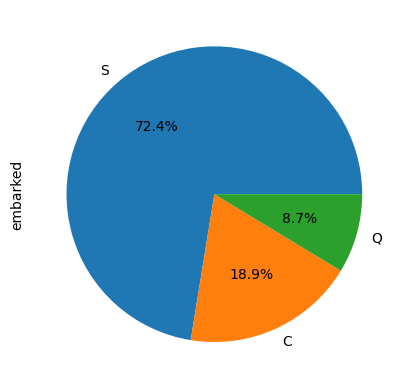

In [14]:
data['embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='fare'>

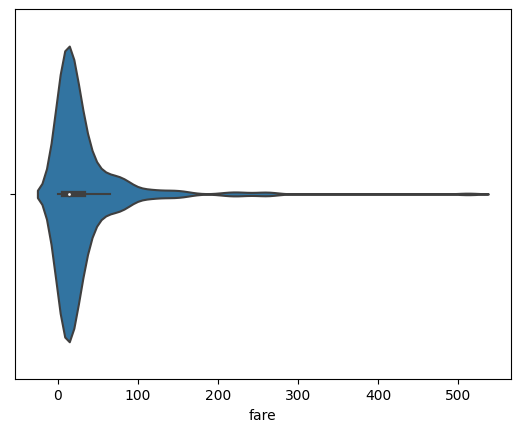

In [15]:
sns.violinplot(x=data["fare"])

<Axes: xlabel='survived'>

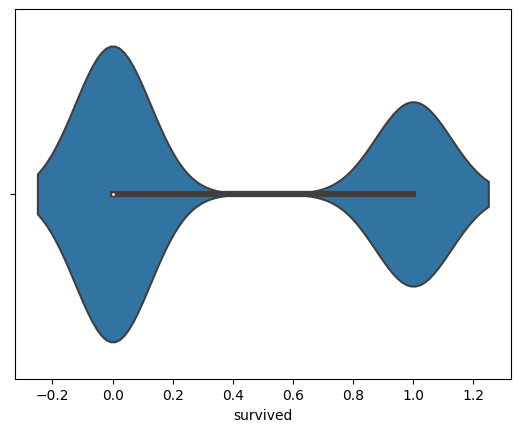

In [16]:
sns.violinplot(x=data["survived"])

<Axes: xlabel='age'>

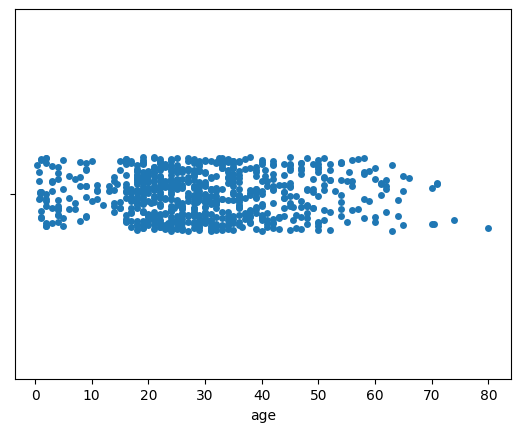

In [17]:
sns.stripplot(x=data["age"])

<Axes: xlabel='sibsp'>

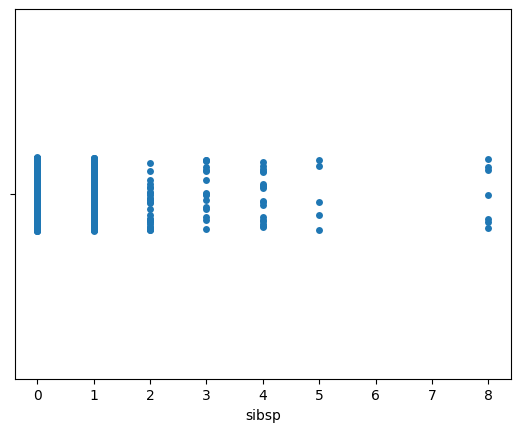

In [18]:
sns.stripplot(x=data["sibsp"])

##Bivariate Analysis

<Axes: xlabel='pclass', ylabel='survived'>

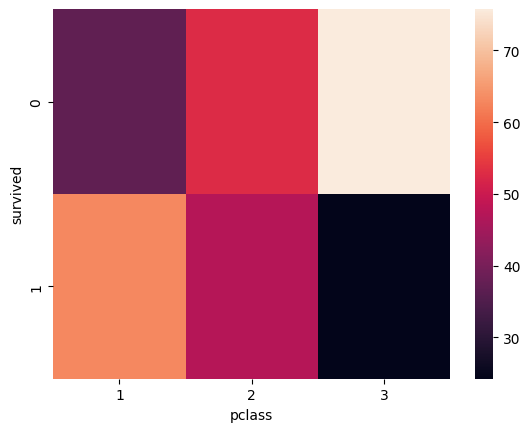

In [20]:
sns.heatmap(pd.crosstab(data['survived'],data['pclass'],normalize='columns')*100)

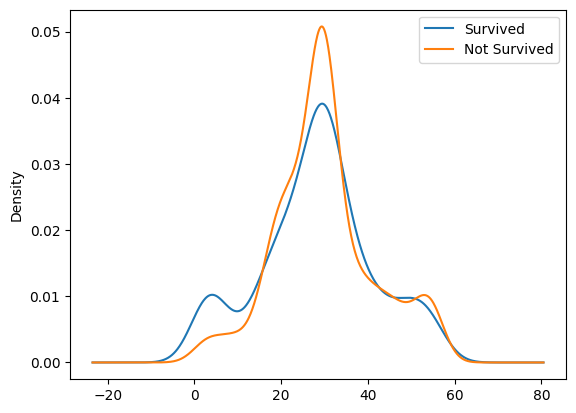

In [37]:
data[data['survived'] == 1]['age'].plot(kind='kde',label='Survived')
data[data['survived'] == 0]['age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

<Axes: xlabel='deck'>

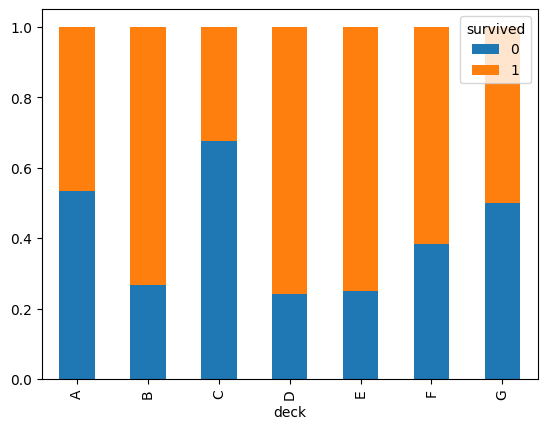

In [38]:
pd.crosstab(data['deck'],data['survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='survived', ylabel='age'>

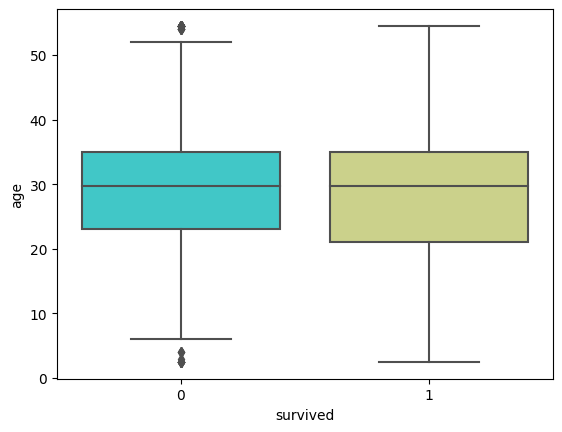

In [39]:
sns.boxplot(x='survived',y='age',data=data,palette='rainbow')

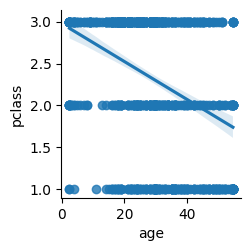

In [48]:
sns.pairplot(data = data, x_vars = 'age', y_vars = 'pclass', kind='reg')

<Axes: xlabel='fare', ylabel='pclass'>

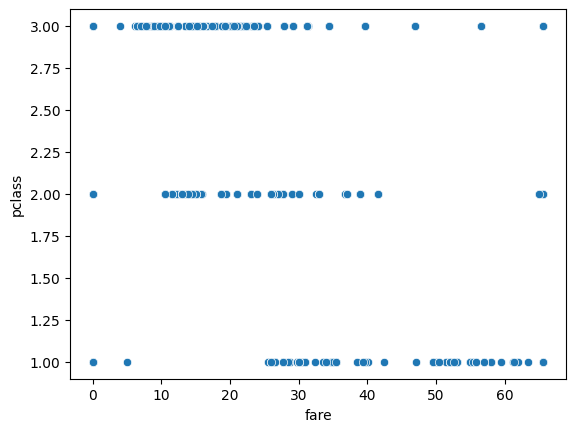

In [50]:
sns.scatterplot(data = data, x = 'fare', y = 'pclass')

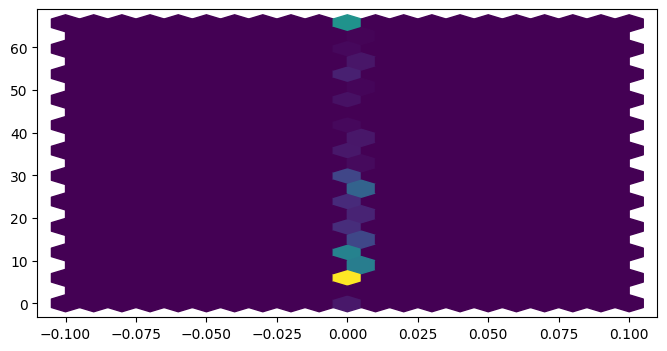

In [60]:
x = data['parch']
y = data['fare']
fig=plt.figure(figsize = (8,4))
plt.hexbin(x,y,gridsize=20)
plt.show()

##Multivariate Analysis

In [62]:
!pip install plotly
import plotly.express as px
px.scatter_3d(data,x = 'survived', y = 'age', z = 'fare', color = 'alive', width = 620, height = 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



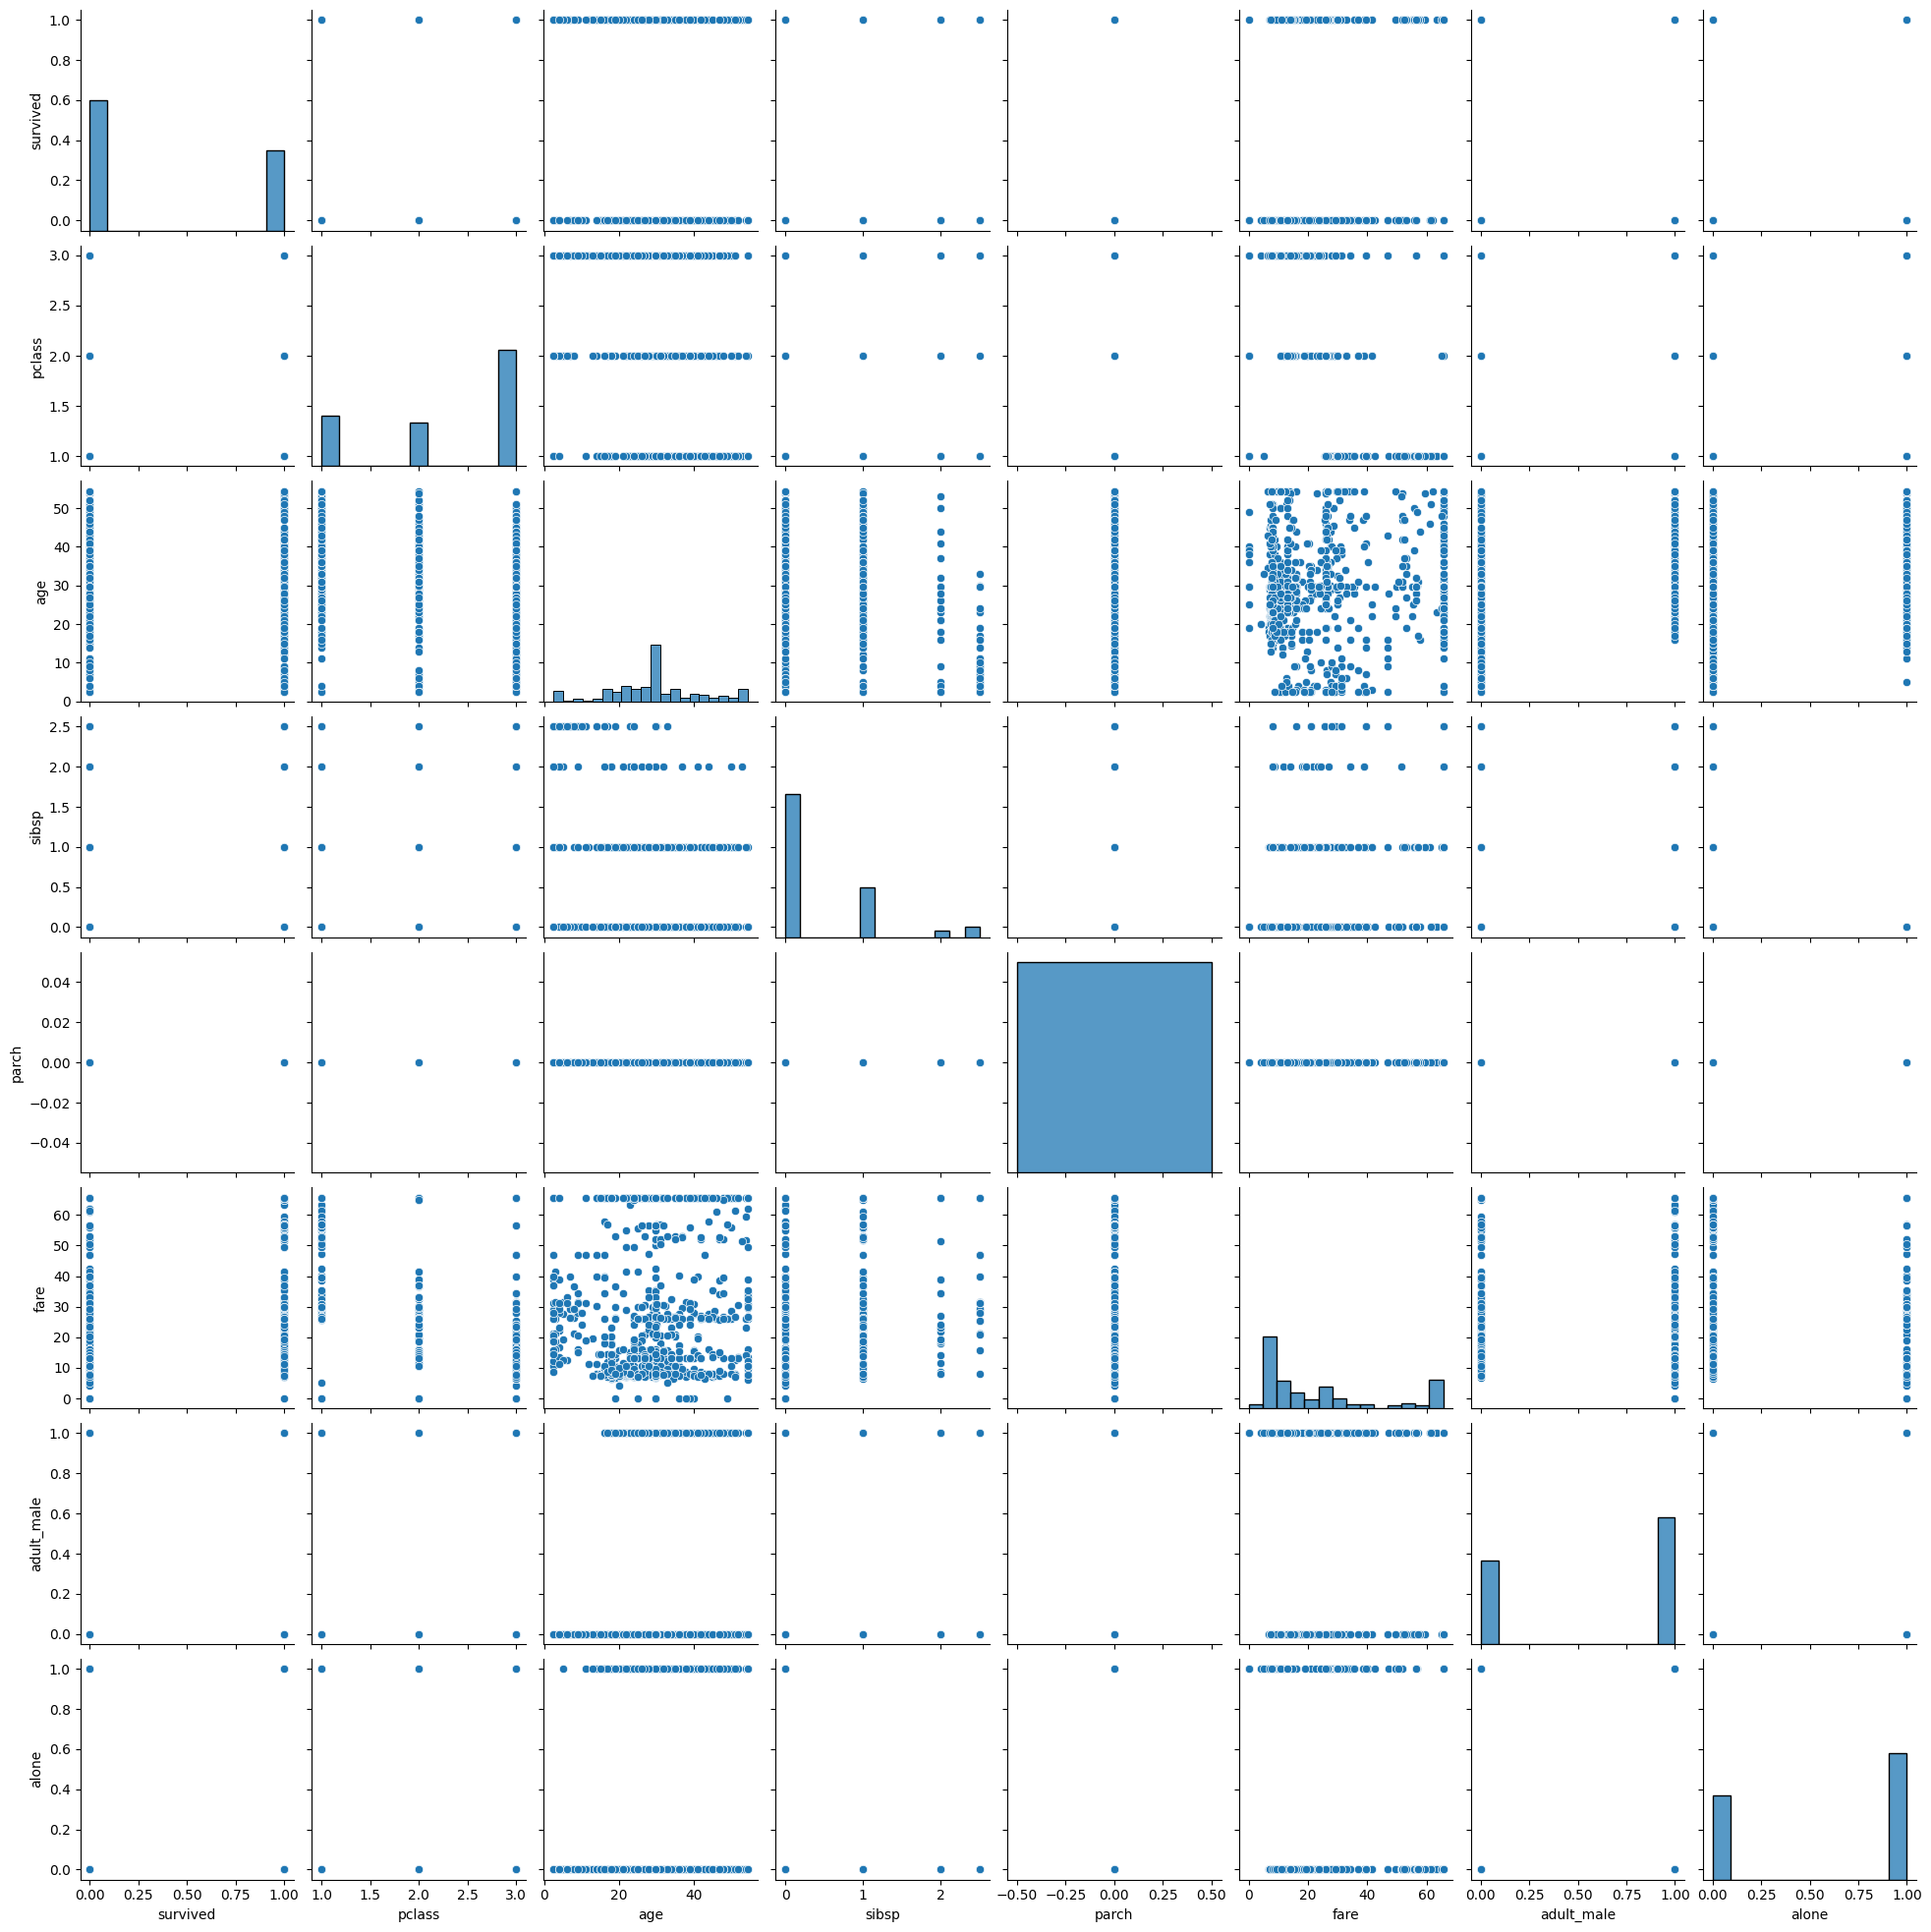

In [63]:
sns.pairplot(data)

<Axes: >

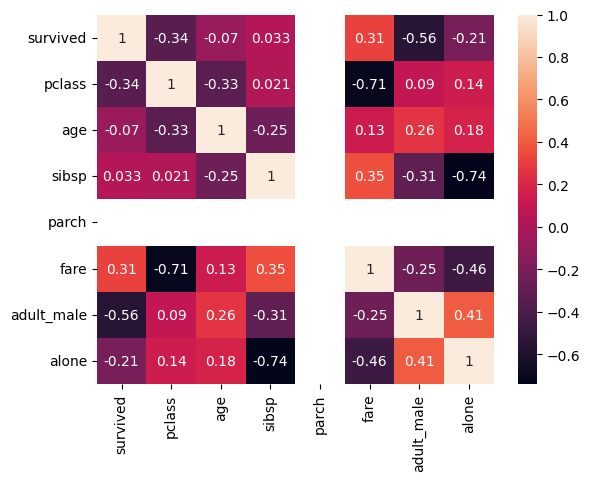

In [66]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

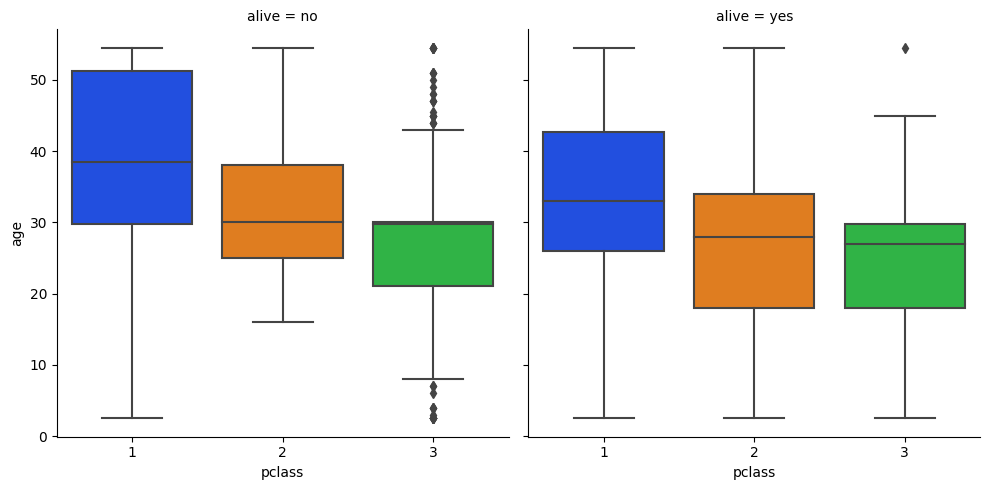

In [71]:
sns.catplot(
    x='pclass', 
    y='age',
    data=data,
    palette='bright',
    kind = 'box',
    col='alive');

In [22]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
data['age']=data['age'].replace(np.NaN, data['age'].mean())

In [24]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
data['deck'].mode()

0    C
Name: deck, dtype: object

In [26]:
data['deck']=data['deck'].fillna(value=data['deck'].mode()[0])

In [27]:
data.dropna(inplace = True)

In [28]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [30]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


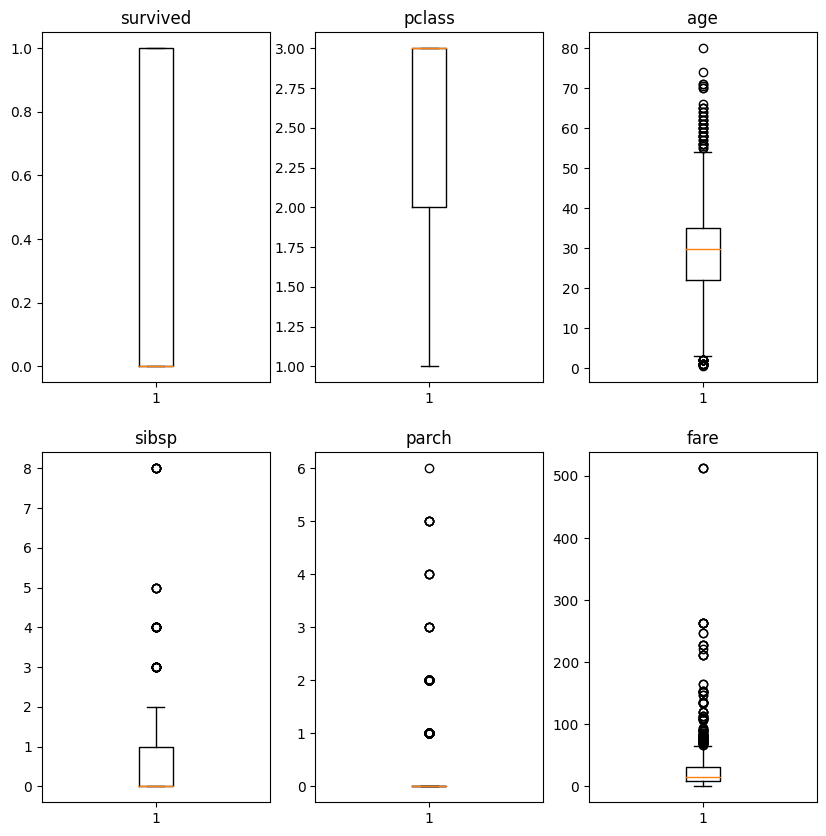

In [31]:
figure,axis =  plt.subplots(2, 3, figsize=(10, 10))

axis[0,0].boxplot(x = data['survived'])
axis[0,0].set_title('survived')
axis[0,1].boxplot(x = data['pclass'])
axis[0,1].set_title('pclass')
axis[0,2].boxplot(x = data['age'])
axis[0,2].set_title('age')
axis[1,0].boxplot(x = data['sibsp'])
axis[1,0].set_title('sibsp')
axis[1,1].boxplot(x = data['parch'])
axis[1,1].set_title('parch')
axis[1,2].boxplot(x = data['fare'])
axis[1,2].set_title('fare')

plt.show()

In [32]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['fare']=np.where(data['fare']>upper_whisker,upper_whisker,np.where(data['fare']<lower_whisker,lower_whisker,data['fare']))

In [33]:
Q1 = data['parch'].quantile(0.25)
Q3 = data['parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['parch']=np.where(data['parch']>upper_whisker,upper_whisker,np.where(data['parch']<lower_whisker,lower_whisker,data['parch']))

In [34]:
Q1 = data['sibsp'].quantile(0.25)
Q3 = data['sibsp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['sibsp']=np.where(data['sibsp']>upper_whisker,upper_whisker,np.where(data['sibsp']<lower_whisker,lower_whisker,data['sibsp']))

In [35]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['age']=np.where(data['age']>upper_whisker,upper_whisker,np.where(data['age']<lower_whisker,lower_whisker,data['age']))

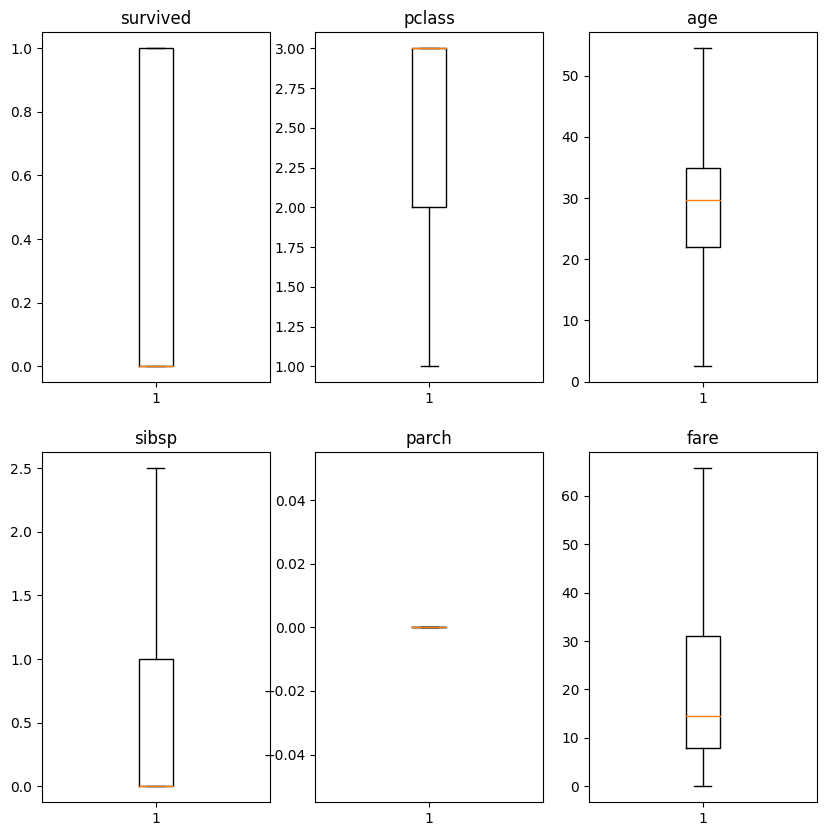

In [36]:
figure,axis =  plt.subplots(2, 3, figsize=(10, 10))

axis[0,0].boxplot(x = data['survived'])
axis[0,0].set_title('survived')
axis[0,1].boxplot(x = data['pclass'])
axis[0,1].set_title('pclass')
axis[0,2].boxplot(x = data['age'])
axis[0,2].set_title('age')
axis[1,0].boxplot(x = data['sibsp'])
axis[1,0].set_title('sibsp')
axis[1,1].boxplot(x = data['parch'])
axis[1,1].set_title('parch')
axis[1,2].boxplot(x = data['fare'])
axis[1,2].set_title('fare')

plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [73]:
ohe = OneHotEncoder()
le = LabelEncoder()

In [74]:
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])
data['class'] = le.fit_transform(data['class'])
data['who'] = le.fit_transform(data['who'])

In [92]:
data.drop(columns=['adult_male','deck','embark_town','alive','alone'],inplace = True)

In [97]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who
0,0,3,1,22.0,1.0,0.0,7.2500,2,2,1
1,1,1,0,38.0,1.0,0.0,65.6563,0,0,2
2,1,3,0,26.0,0.0,0.0,7.9250,2,2,2
3,1,1,0,35.0,1.0,0.0,53.1000,2,0,2
4,0,3,1,35.0,0.0,0.0,8.0500,2,2,1


In [93]:
X = data.drop('survived', axis=1)
y = data['survived']

In [94]:
# Indepndent Variable
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who
0,3,1,22.000000,1.0,0.0,7.2500,2,2,1
1,1,0,38.000000,1.0,0.0,65.6563,0,0,2
2,3,0,26.000000,0.0,0.0,7.9250,2,2,2
3,1,0,35.000000,1.0,0.0,53.1000,2,0,2
4,3,1,35.000000,0.0,0.0,8.0500,2,2,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0.0,0.0,13.0000,2,1,1
887,1,0,19.000000,0.0,0.0,30.0000,2,0,2
888,3,0,29.699118,1.0,0.0,23.4500,2,2,2
889,1,1,26.000000,0.0,0.0,30.0000,0,0,1


In [95]:
# Dependent Variable
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

scaled_data

array([[1.        , 1.        , 0.375     , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.68269231, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.45192308, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.52305995, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.45192308, ..., 0.        , 0.        ,
        0.5       ],
       [1.        , 1.        , 0.56730769, ..., 0.5       , 1.        ,
        0.5       ]])

In [98]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [99]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who
712,1,1,48.000000,1.0,0.0,52.0000,2,0,1
5,3,1,29.699118,0.0,0.0,8.4583,1,2,1
83,1,1,28.000000,0.0,0.0,47.1000,2,0,1
635,2,0,28.000000,0.0,0.0,13.0000,2,1,2
716,1,0,38.000000,0.0,0.0,65.6563,0,0,2
...,...,...,...,...,...,...,...,...,...
413,2,1,29.699118,0.0,0.0,0.0000,2,1,1
571,1,0,53.000000,2.0,0.0,51.4792,2,0,2
441,3,1,20.000000,0.0,0.0,9.5000,2,2,1
591,1,0,52.000000,1.0,0.0,65.6563,0,0,2


In [100]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who
606,3,1,30.0,0.0,0.0,7.8958,2,2,1
641,1,0,24.0,0.0,0.0,65.6563,0,0,2
177,1,0,50.0,0.0,0.0,28.7125,0,0,2
745,1,1,54.5,1.0,0.0,65.6563,2,0,1
866,2,0,27.0,1.0,0.0,13.8583,0,1,2
...,...,...,...,...,...,...,...,...,...
346,2,0,40.0,0.0,0.0,13.0000,2,1,2
50,3,1,7.0,2.5,0.0,39.6875,2,2,0
679,1,1,36.0,0.0,0.0,65.6563,0,0,1
267,3,1,25.0,1.0,0.0,7.7750,2,2,1


In [101]:
y_train

712    1
5      0
83     0
635    1
716    1
      ..
413    0
571    1
441    0
591    1
534    0
Name: survived, Length: 666, dtype: int64

In [102]:
y_test

606    0
641    1
177    0
745    0
866    1
      ..
346    1
50     0
679    1
267    1
170    0
Name: survived, Length: 223, dtype: int64